In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import os


In [ ]:
X_train = pd.read_csv('data/X_train_music.csv')
X_test = pd.read_csv('data/X_test_music.csv')
y_train = pd.read_csv('data/y_train_music.csv').values.ravel()
y_test = pd.read_csv('data/y_test_music.csv').values.ravel()


df_full_features = pd.read_csv('data/df_features.csv')

# Instanciar e treinar o LabelEncoder para decodificar os rótulos no final
le = LabelEncoder()
le.fit(df_full_features['genre'])
print(le.classes_)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("Treinando o modelo XGBoost...")
xgb_model.fit(X_train, y_train)
print("Treinamento concluído!")

Treinando o modelo XGBoost...
Treinamento concluído!



Relatório de Classificação:
              precision    recall  f1-score   support

       blues       0.76      0.65      0.70        20
   classical       0.94      0.85      0.89        20
     country       0.59      0.65      0.62        20
       disco       0.56      0.50      0.53        20
      hiphop       0.50      0.65      0.57        20
        jazz       0.70      0.80      0.74        20
       metal       0.87      0.65      0.74        20
         pop       0.80      0.80      0.80        20
      reggae       0.65      0.55      0.59        20
        rock       0.42      0.50      0.45        20

    accuracy                           0.66       200
   macro avg       0.68      0.66      0.66       200
weighted avg       0.68      0.66      0.66       200



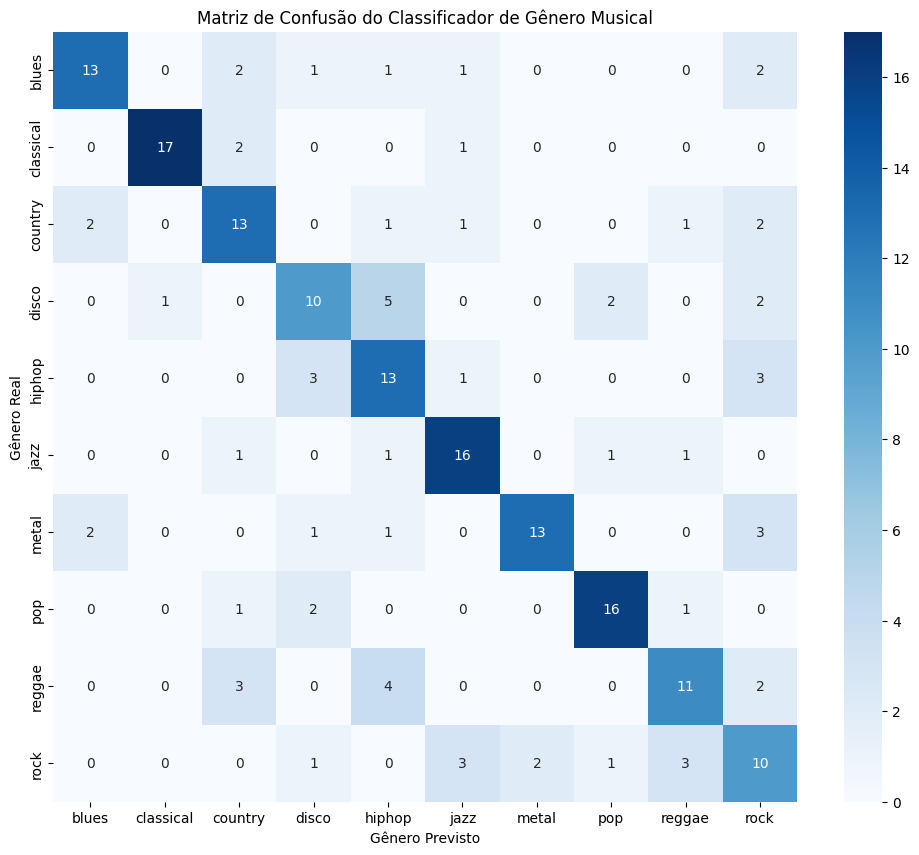

In [14]:
y_pred = xgb_model.predict(X_test)

# Gerar o relatório de classificação
# O target_names usa o LabelEncoder para mostrar os nomes dos gêneros
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Gerar e visualizar a matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel('Gênero Previsto')
plt.ylabel('Gênero Real')
plt.title('Matriz de Confusão do Classificador de Gênero Musical')
plt.show()